## Project 6

In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy
import requests
from imdbpie import Imdb
import nltk
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import nltk
import collections
import re
import csv
import psycopg2

%matplotlib inline

### Pre-Work: Write a problem statement 

What factors lead to certain ratings on movies. Given that Netflix does not currently store this type of data, your boss has suggested that you collect ratings and reviews data from IMDB.

## Part 1: Acquire the Data

#### 1. Connect to the IMDB API

In [2]:
imdb = Imdb()
imdb = Imdb(anonymize=True)

#### 2. Query the top 250 rated movies in the database

In [3]:
movies = pd.DataFrame(imdb.top_250())

In [4]:
movies.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1733709,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1184615,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,812439,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1718423,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,463000,8.9,tt0050083,12 Angry Men,feature,1957


#### 3. Only select the top 25 movies and delete the uncessary rows

In [5]:
top25 = movies[0:25]
top25

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1733709,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1184615,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,812439,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1718423,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,463000,8.9,tt0050083,12 Angry Men,feature,1957
5,True,{u'url': u'https://images-na.ssl-images-amazon...,888051,8.9,tt0108052,Schindler's List,feature,1993
6,True,{u'url': u'https://images-na.ssl-images-amazon...,1357710,8.9,tt0110912,Pulp Fiction,feature,1994
7,True,{u'url': u'https://images-na.ssl-images-amazon...,1245159,8.9,tt0167260,The Lord of the Rings: The Return of the King,feature,2003
8,True,{u'url': u'https://images-na.ssl-images-amazon...,515908,8.9,tt0060196,"The Good, the Bad and the Ugly",feature,1966
9,True,{u'url': u'https://images-na.ssl-images-amazon...,1384212,8.8,tt0137523,Fight Club,feature,1999


In [6]:
del top25['can_rate']
del top25['image']
del top25['type']

In [7]:
top25.head()

,num_votes,rating,tconst,title,year
0,1733709,9.3,tt0111161,The Shawshank Redemption,1994
1,1184615,9.2,tt0068646,The Godfather,1972
2,812439,9.0,tt0071562,The Godfather: Part II,1974
3,1718423,9.0,tt0468569,The Dark Knight,2008
4,463000,8.9,tt0050083,12 Angry Men,1957


In [8]:
import requests
import json

movies = {'genre': [], 'runtime':[]}   # create empty dictionary for genre runtime
for a in top25.tconst:  # for each IMDB id
    path = "http://www.omdbapi.com/?i=%s&plot=short&r=json" % a   # parse through the paths of each id,
    #substituting the new id via the %s %sub method
    movie_dict = json.loads(requests.get(path).text)   #load the request data into json object
    movies['genre'].append(movie_dict['Genre'])   #append the genres, runtime to a dictionary
    movies['runtime'].append(movie_dict['Runtime'])
    
top25['genre'] = movies['genre']   # finish dataframe
top25['runtime'] = movies['runtime'] 

In [9]:
top25.head()

,num_votes,rating,tconst,title,year,genre,runtime
0,1733709,9.3,tt0111161,The Shawshank Redemption,1994,"Crime, Drama",142 min
1,1184615,9.2,tt0068646,The Godfather,1972,"Crime, Drama",175 min
2,812439,9.0,tt0071562,The Godfather: Part II,1974,"Crime, Drama",202 min
3,1718423,9.0,tt0468569,The Dark Knight,2008,"Action, Crime, Drama",152 min
4,463000,8.9,tt0050083,12 Angry Men,1957,"Crime, Drama",96 min


In [10]:
top25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
num_votes    25 non-null int64
rating       25 non-null float64
tconst       25 non-null object
title        25 non-null object
year         25 non-null object
genre        25 non-null object
runtime      25 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ KB


#### 4. Write the Results to a csv

In [11]:
top25.to_csv('imdb25')

## Part 2: Wrangle the text data

#### 1. Convert the listing identification numbers (tconst) from the first dataframe to a list

In [12]:
top25ID = top25.tconst.values.tolist()

In [13]:
top25ID

[u'tt0111161',
 u'tt0068646',
 u'tt0071562',
 u'tt0468569',
 u'tt0050083',
 u'tt0108052',
 u'tt0110912',
 u'tt0167260',
 u'tt0060196',
 u'tt0137523',
 u'tt0120737',
 u'tt0080684',
 u'tt0109830',
 u'tt1375666',
 u'tt0167261',
 u'tt0073486',
 u'tt0099685',
 u'tt0133093',
 u'tt0047478',
 u'tt0076759',
 u'tt0317248',
 u'tt0114369',
 u'tt0102926',
 u'tt0038650',
 u'tt0114814']

In [14]:
len(top25ID)

25

#### 2. Scrape the reviews for the top 25 movies

*Hint*: Use a loop to scrape each page at once

In [15]:
reviewList = []
tconstList2 = []

for item in top25ID:
    reviews = imdb.get_title_reviews(item, max_results=15)
    for review in reviews:
        tconstList2.append(item)
        reviewList.append(review.text)
        



In [16]:
reviews = pd.DataFrame({
        'tconst1':tconstList2,
        'review':reviewList,
        
        })
reviews.head()

,review,tconst1
0,Why do I want to write the 234th comment on Th...,tt0111161
1,"\nCan Hollywood, usually creating things for e...",tt0111161
2,\nI have never seen such an amazing film since...,tt0111161
3,"In its Oscar year, Shawshank Redemption (writt...",tt0111161
4,The reason I became a member of this database ...,tt0111161


In [17]:
reviews.tail()

,review,tconst1
370,Usual Suspects is one of the Best Mystery Thri...,tt0114814
371,"\nThe Usual Suspects, is, in my mind, one of t...",tt0114814
372,Out of the mind of Christorpher McQurrie comes...,tt0114814
373,Kaiser Soze is a super-criminal of almost comi...,tt0114814
374,I don't know what the problem is. I had heard ...,tt0114814


In [18]:
reviews.dtypes

review     object
tconst1    object
dtype: object

In [19]:
foo = str(reviews)
regex = re.compile('[^a-zA-Z]')
new = regex.sub(' ', foo)

In [20]:
reviews1=reviews
reviews=reviews1.replace("\n", " ", regex=True)


In [21]:
reviews.columns

Index([u'review', u'tconst1'], dtype='object')

#### 3. Work through each title and find the most common descriptors

*Hint*: "soup" from BeautifulSoup is the html returned from all 25 pages. You'll need to either address each page individually or break them down by elements

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
# words = ('best', 'hope', 'love', 'beautiful', 'great', 'amazing')

vectorizer = CountVectorizer(analyzer= 'word', vocabulary= ['best', 'hope', 'love', 'beautiful', 'great', 'amazing'], stop_words="english")
vectorizer.fit(reviews.review)

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None,
        vocabulary=['best', 'hope', 'love', 'beautiful', 'great', 'amazing'])

In [80]:
vectorDF  = pd.DataFrame(vectorizer.transform(reviews.review).todense(),
             columns= ('best', 'hope', 'love', 'beautiful', 'great', 'amazing'))
vectorDF.head()

,best,hope,love,beautiful,great,amazing
0,5,1,0,0,0,0
1,1,4,0,1,2,1
2,0,1,1,0,1,1
3,5,4,3,0,0,1
4,0,2,0,0,0,0


In [81]:
vectorDF.tail()

,best,hope,love,beautiful,great,amazing
370,2,0,0,0,3,0
371,1,0,0,0,0,0
372,0,0,0,0,1,0
373,1,0,0,0,1,0
374,0,0,0,0,0,0


In [82]:
vectorDF25 = vectorDF[:25]
vectorDF25.head()

,best,hope,love,beautiful,great,amazing
0,5,1,0,0,0,0
1,1,4,0,1,2,1
2,0,1,1,0,1,1
3,5,4,3,0,0,1
4,0,2,0,0,0,0


#### 4. Convert to a string and remove the non AlphaNumeric characters

*Hint*: Use regular expressions!

#### 5. Tokenize the Output

#### 6. Convert to a Dataframe for Easy Viewing

In [83]:
reviews25 = reviews[:25]

In [84]:
combined = pd.concat([top25, reviews25, vectorDF25], axis=1)
combined.head()

,num_votes,rating,tconst,title,year,genre,runtime,review,tconst1,best,hope,love,beautiful,great,amazing
0,1733709,9.3,tt0111161,The Shawshank Redemption,1994,"Crime, Drama",142 min,Why do I want to write the 234th comment on Th...,tt0111161,5,1,0,0,0,0
1,1184615,9.2,tt0068646,The Godfather,1972,"Crime, Drama",175 min,"Can Hollywood, usually creating things for en...",tt0111161,1,4,0,1,2,1
2,812439,9.0,tt0071562,The Godfather: Part II,1974,"Crime, Drama",202 min,I have never seen such an amazing film since ...,tt0111161,0,1,1,0,1,1
3,1718423,9.0,tt0468569,The Dark Knight,2008,"Action, Crime, Drama",152 min,"In its Oscar year, Shawshank Redemption (writt...",tt0111161,5,4,3,0,0,1
4,463000,8.9,tt0050083,12 Angry Men,1957,"Crime, Drama",96 min,The reason I became a member of this database ...,tt0111161,0,2,0,0,0,0


In [85]:
del combined['tconst1']

In [86]:
combined.head()

,num_votes,rating,tconst,title,year,genre,runtime,review,best,hope,love,beautiful,great,amazing
0,1733709,9.3,tt0111161,The Shawshank Redemption,1994,"Crime, Drama",142 min,Why do I want to write the 234th comment on Th...,5,1,0,0,0,0
1,1184615,9.2,tt0068646,The Godfather,1972,"Crime, Drama",175 min,"Can Hollywood, usually creating things for en...",1,4,0,1,2,1
2,812439,9.0,tt0071562,The Godfather: Part II,1974,"Crime, Drama",202 min,I have never seen such an amazing film since ...,0,1,1,0,1,1
3,1718423,9.0,tt0468569,The Dark Knight,2008,"Action, Crime, Drama",152 min,"In its Oscar year, Shawshank Redemption (writt...",5,4,3,0,0,1
4,463000,8.9,tt0050083,12 Angry Men,1957,"Crime, Drama",96 min,The reason I became a member of this database ...,0,2,0,0,0,0


In [87]:
combined.tail()

,num_votes,rating,tconst,title,year,genre,runtime,review,best,hope,love,beautiful,great,amazing
20,545805,8.7,tt0317248,City of God,2002,"Crime, Drama",130 min,The Godfather is one of the very few films th...,0,0,0,0,0,2
21,1052570,8.6,tt0114369,Se7en,1995,"Crime, Drama, Mystery",127 min,This must rank as the best film (along with pa...,1,0,0,0,0,0
22,913347,8.6,tt0102926,The Silence of the Lambs,1991,"Crime, Drama, Thriller",118 min,I love this movie and all of the GF movies. I ...,0,0,4,0,0,0
23,282704,8.6,tt0038650,It's a Wonderful Life,1946,"Drama, Family, Fantasy",130 min,'The Godfather' is the pinnacle of flawless fi...,0,0,0,1,0,1
24,759812,8.6,tt0114814,The Usual Suspects,1995,"Crime, Drama, Mystery",106 min,The godfather trilogy is an exclusive set of m...,0,0,1,0,1,1


In [90]:
# import string
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# stop = nltk.corpus.stopwords.words('english')
# punc = list(string.punctuation)


In [88]:
# tokenDictionary = collections.Counter()

# for review in combined.review:
#     listOfTokens = nltk.word_tokenize(review.lower())
#     listOfTokens = [token for token in listOfTokens if token not in stop and token not in punc]
#     listOfTokenTags = nltk.pos_tag(listOfTokens)
#     for tag in listOfTokenTags:
#         key, value = tag
#         if "JJ" not in value:
#             listOfTokens.remove(key)
#     freqDist = nltk.probability.FreqDist(listOfTokens)
#     freqDistDict = dict(freqDist.items())
#     newTokens = collections.Counter(freqDistDict)
#     tokenDictionary = tokenDictionary + newTokens

In [89]:
# mostCommon = tokenDictionary.most_common(15)
# print mostCommon

####  7. Find the rows with the top five descriptive words

#### 8. Write the results to a csv

#### 9. Repeat the process for the other top 24 titles

## Part 3: Combine Tables in PostgreSQL

#### 1. Import your two .csv data files into your Postgre Database as two different tables

For ease, we can call these table1 and table2

#### 2. Connect to database and query the joined set

#### 3. Join the two tables 

#### 4. Select the newly joined table and save two copies of the into dataframes

## Part 4: Parsing and Exploratory Data Analysis

#### 1. Rename the column headings

In [92]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
num_votes    25 non-null int64
rating       25 non-null float64
tconst       25 non-null object
title        25 non-null object
year         25 non-null object
genre        25 non-null object
runtime      25 non-null object
review       25 non-null object
best         25 non-null int64
hope         25 non-null int64
love         25 non-null int64
beautiful    25 non-null int64
great        25 non-null int64
amazing      25 non-null int64
dtypes: float64(1), int64(7), object(6)
memory usage: 2.8+ KB


In [93]:
combined.describe()

,num_votes,rating,best,hope,love,beautiful,great,amazing
count,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.908469e+05,8.812000,1.240000,1.040000,0.480000,0.080000,1.000000,0.280000
std,4.102735e+05,0.178699,2.087263,1.306395,1.045626,0.276887,1.154701,0.541603
min,2.348110e+05,8.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.473970e+05,8.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.328400e+05,8.800000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.267595e+06,8.900000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000
max,1.733709e+06,9.300000,8.000000,4.000000,4.000000,1.000000,4.000000,2.000000


#### 2. Run a description of the data

In [94]:
combined.corr()

,num_votes,rating,best,hope,love,beautiful,great,amazing
num_votes,1.000000,0.478290,0.272976,0.436495,0.256128,-1.886652e-01,-3.868105e-02,-0.203702
rating,0.478290,1.000000,0.394111,0.604694,-0.099009,1.482095e-01,2.019283e-02,0.049939
best,0.272976,0.394111,1.000000,0.210260,0.078656,-1.067014e-01,-2.074548e-01,-0.098779
hope,0.436495,0.604694,0.210260,1.000000,0.198878,2.211629e-01,1.657282e-01,0.101289
love,0.256128,-0.099009,0.078656,0.198878,1.000000,-1.381594e-01,-2.415690e-01,0.120663
beautiful,-0.188665,0.148209,-0.106701,0.221163,-0.138159,1.000000e+00,-1.446859e-17,0.400099
great,-0.038681,0.020193,-0.207455,0.165728,-0.241569,-1.446859e-17,1.000000e+00,-0.199876
amazing,-0.203702,0.049939,-0.098779,0.101289,0.120663,4.000988e-01,-1.998757e-01,1.000000


#### 3. Visualize the Data

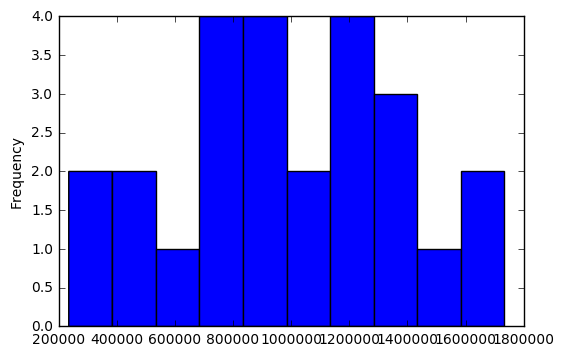

In [109]:
combined.num_votes.plot(kind='hist')


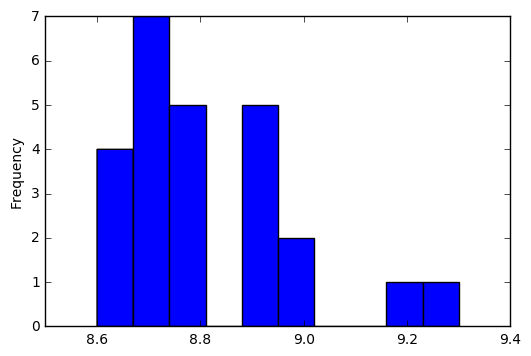

In [110]:
combined.rating.plot(kind='hist', label='rating')

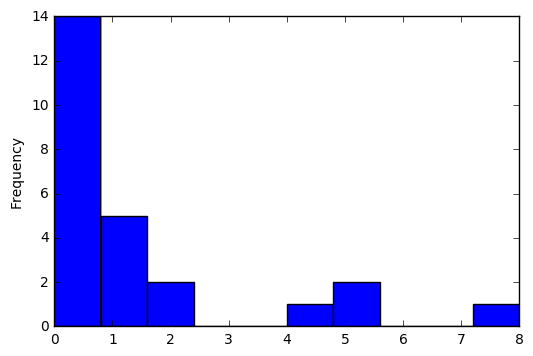

In [111]:
combined.best.plot(kind='hist', label='best')

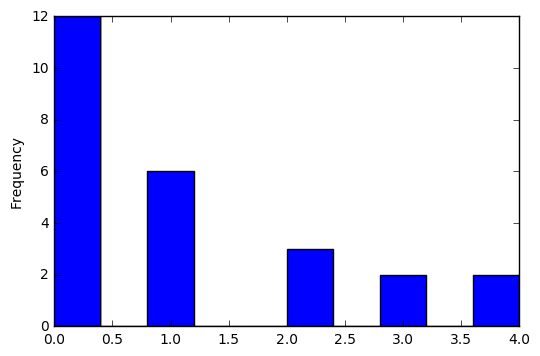

In [112]:
combined.hope.plot(kind='hist', label='hope')

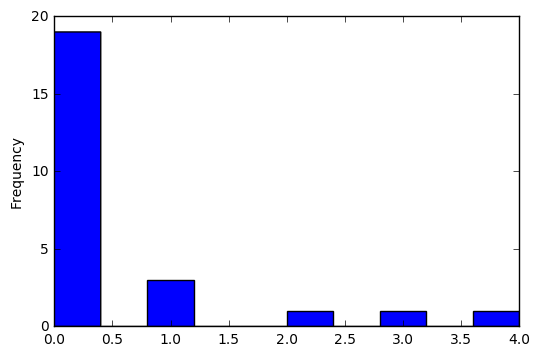

In [113]:
combined.love.plot(kind='hist', label='love')

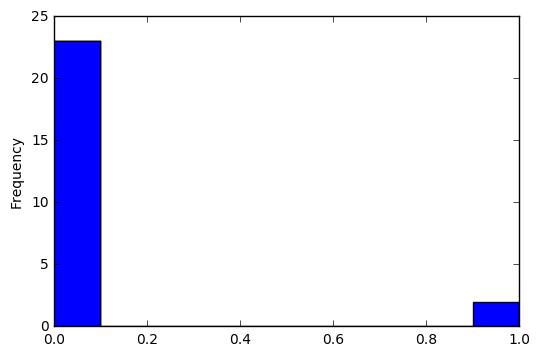

In [114]:
combined.beautiful.plot(kind='hist', label='beautiful')


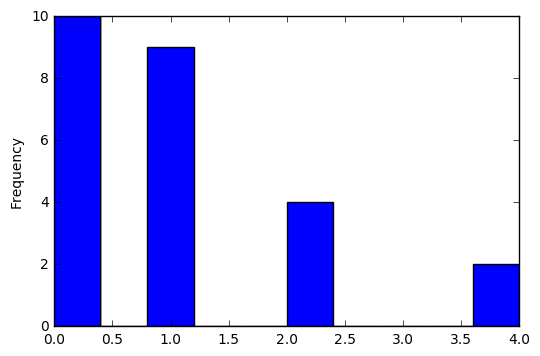

In [115]:
combined.great.plot(kind='hist', label='great')

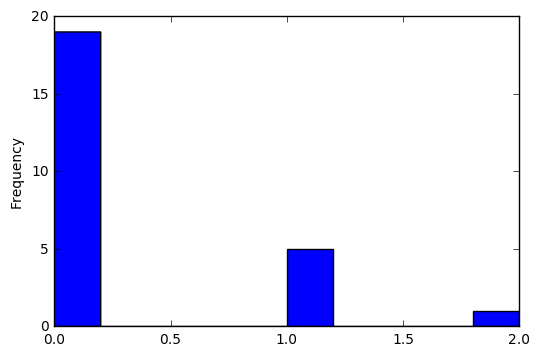

In [116]:
combined.amazing.plot(kind='hist', label='amazing')

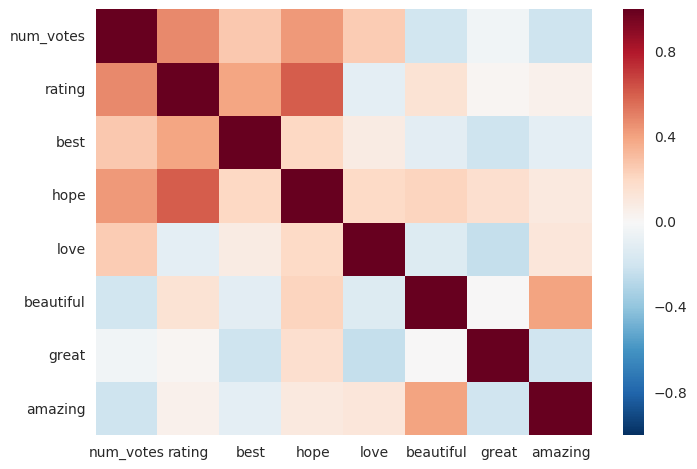

In [121]:
import seaborn as sns

sns.heatmap(combined.corr())

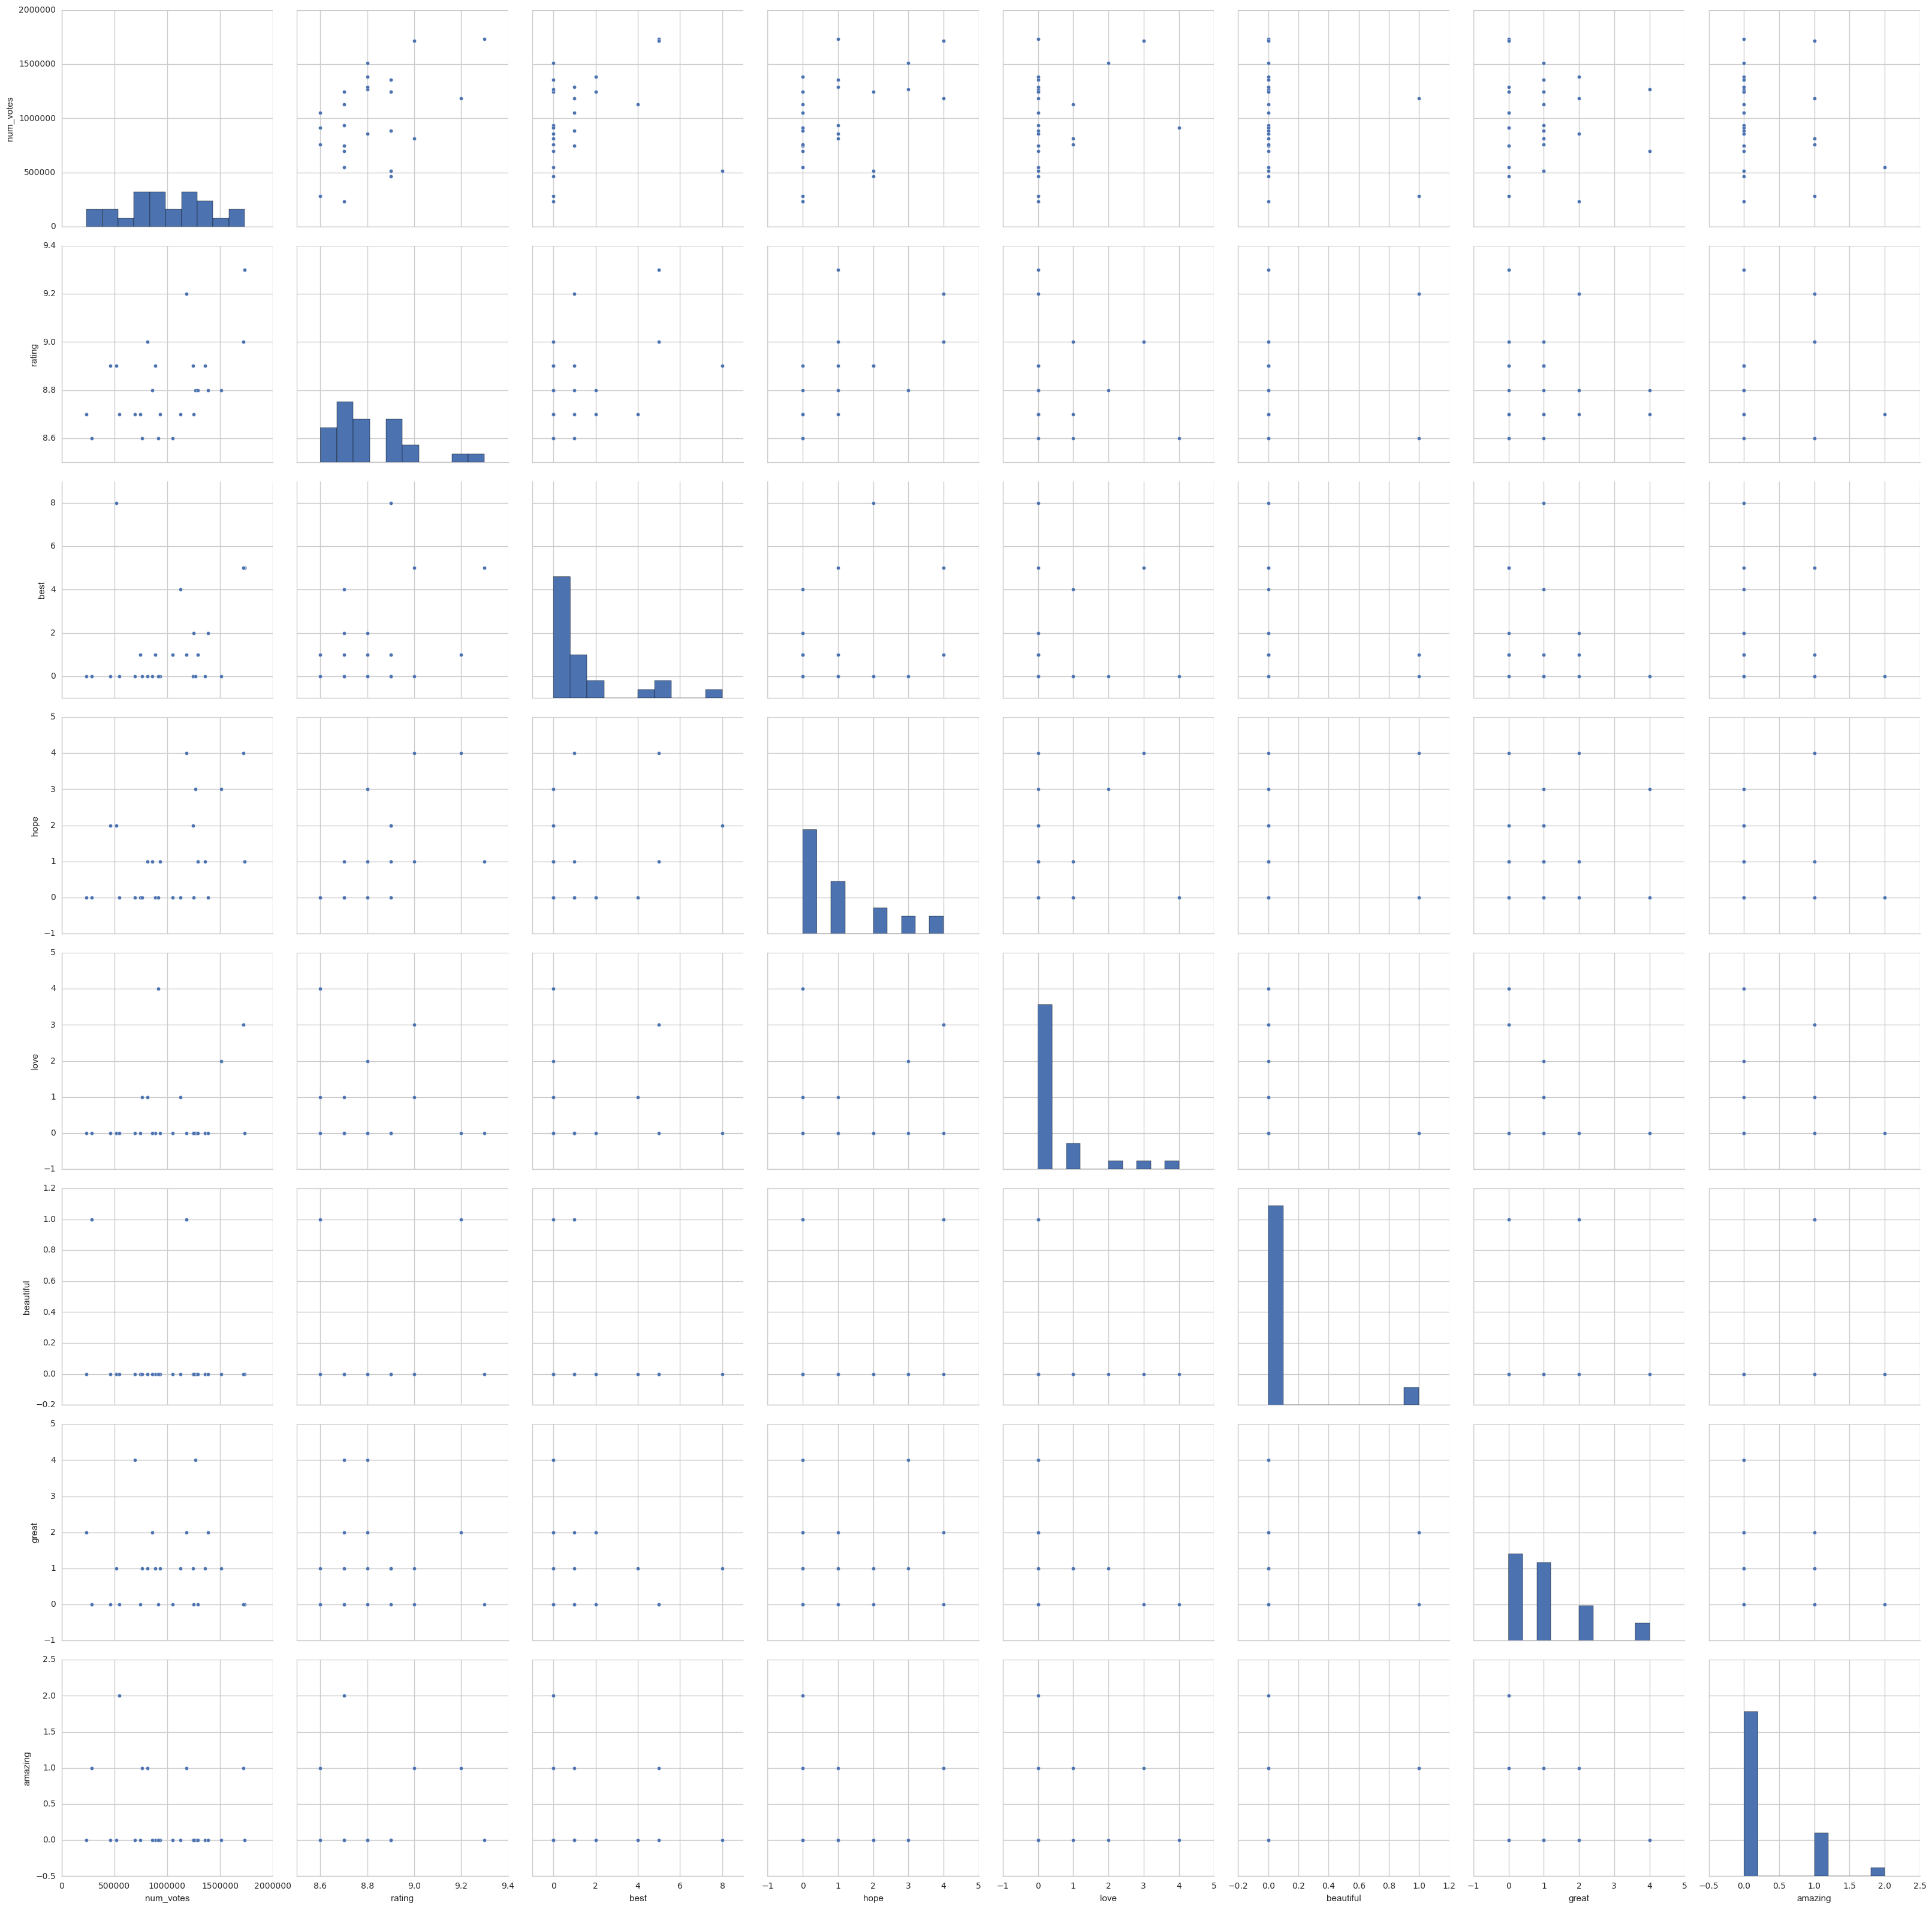

In [127]:

sns.pairplot(combined[[ 
                       'num_votes', 
                       'rating',
                       'best',
                       'hope',
                        'love',
        'beautiful',
        'great',
        'amazing']], size = 4)

## Part 3: Build the Decision Tree

#### 1. What is our target attribute? 

Movies that scored a rating of 8.8 or higher.

#### 2. Prepare the data and define the training set

In [132]:
from sklearn.cross_validation import train_test_split

Y = combined['rating']
X = combined[['num_votes', 'best', 'hope', 'love', 'beautiful', 'great', 'amazing']].values

#### 2. Train the Model

In [133]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)



In [134]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

#### 3. Set up test data and test the model

In [136]:
preds = treereg.predict(X_test)

#### 5. Check the results

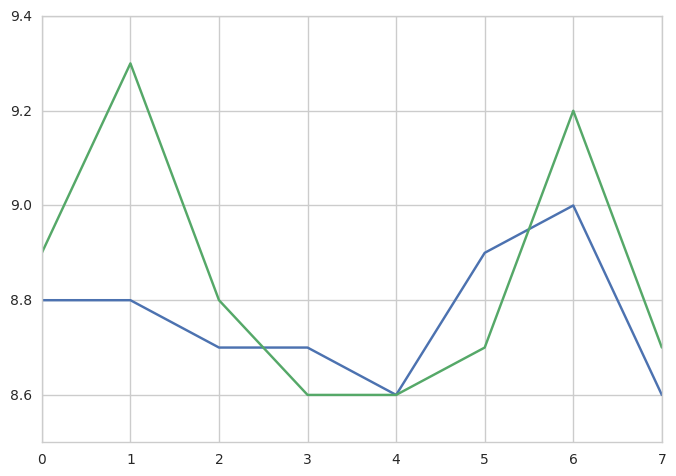

In [139]:
plt.plot(preds)
plt.plot(y_test.values)

In [140]:
print preds
print y_test.values

[ 8.8  8.8  8.7  8.7  8.6  8.9  9.   8.6]
[ 8.9  9.3  8.8  8.6  8.6  8.7  9.2  8.7]


In [141]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.2600000000000009

#### 6. What is overfitting and how are we at risk? 